# Лабораторная работа №3

### Задание № 4.1.16

In [1]:
import numpy as np
from typing import Callable, Optional, Union,Dict, Tuple
import matplotlib.pyplot as plt
import numpy.typing as npt
import scipy.optimize
from scipy.optimize import minimize
import math

In [2]:
def grad(f: Callable[[np.array], np.array],
         x: np.array,
         eps: float = 1e-5) -> np.array:
    dim = len(x)
    grad_vector = np.zeros((dim, ), dtype=np.double)
    for i in range(dim):
        delta = np.zeros(dim)
        delta[i] += eps
        grad_vector[i] = (f(x + delta) - f(x - delta)) / (eps * 2)
    return grad_vector


def hessian(f: Callable[[np.array], np.array],
            x: np.array,
            eps: float = 1e-5) -> np.array:
    dim = len(x)
    hess = np.zeros((dim, dim), dtype=np.double)
    for i in range(dim):
        i_d = np.zeros(dim)
        i_d[i] += eps
        for j in range(dim):
            j_d = np.zeros(dim)
            j_d[j] += eps
            hess[i, j] = (f(x - i_d - j_d) - f(x + i_d - j_d)
                          - f(x - i_d + j_d) + f(x + i_d + j_d)
                          ) / (4 * eps ** 2)
    return hess


def jacobian(f: Callable[[np.array], np.array],
             x: np.array,
             f_cnt: int,
             eps: float = 1e-5) -> np.array:
    jac = np.zeros((f_cnt, len(x)), dtype=np.double)
    for i in range(len(x)):
        delta = np.zeros(len(x))
        delta[i] += eps
        jac[:, i] = (f(x + delta) - f(x - delta)) / (eps * 2)
    return jac


def root(f: Callable[[np.array], np.array],
           initial: np.array,
           eps: float = 1e-6) -> np.array:
    x = initial.astype(np.double)
    iter_cnt = 0
    f_cnt = len(f(initial))
    while np.linalg.norm(f(x)) > eps:
        x -= np.linalg.inv(jacobian(f, x, f_cnt)).dot(f(x))
        iter_cnt += 1
    return x, iter_cnt


def minimize(f: Callable[[np.array], np.array],
             initial: np.array,
             eps: float = 1e-6) -> np.array:
    x = initial.astype(np.double)
    point_grad = grad(f, x)
    iter_cnt = 0
    while np.linalg.norm(point_grad) > eps:
        x -= np.linalg.inv(hessian(f, x)).dot(point_grad)
        point_grad = grad(f, x)
        iter_cnt += 1
    return x, iter_cnt

grad: Эта функция вычисляет численный градиент функции f в точке x с использованием формулы конечных разностей. Она принимает на вход функцию f, точку x и желаемую точность eps. Затем она вычисляет производные по каждой координате с помощью разностей, чтобы получить вектор градиента.

hessian: Эта функция вычисляет численную матрицу Гессе функции f в точке x с использованием формулы конечных разностей. Она принимает на вход функцию f, точку x и желаемую точность eps. Затем она вычисляет смешанные производные по каждой паре координат с помощью разностей, чтобы получить матрицу Гессе.

jacobian: Эта функция вычисляет численный якобиан функции f в точке x с использованием формулы конечных разностей. Она принимает на вход функцию f, точку x, количество функций f_cnt в системе и желаемую точность eps. Затем она вычисляет частные производные по каждой переменной для каждой функции системы с помощью разностей.

root: Это основная функция для метода Ньютона, которая находит корень системы нелинейных уравнений с заданной точностью eps. Она принимает на вход функцию f, представляющую систему уравнений, начальное приближение initial и желаемую точность eps. Затем она итеративно применяет метод Ньютона, пока норма вектора функции не станет меньше eps, и возвращает найденный корень и количество итераций.

minimize: Эта функция используется для минимизации функций методом Ньютона. Она принимает на вход функцию f, начальное приближение initial и желаемую точность eps. Она итеративно применяет метод Ньютона для нахождения локального минимума функции, пока норма градиента не станет меньше eps, и возвращает найденную точку минимума и количество итераций.

var_f: Это функция, представляющая систему нелинейных уравнений из задания. Она принимает на вход точку x и возвращает вектор значений функций системы в этой точке.


Newton's method first solution: [-0.30198223 -0.22737441]
Number of iterations: 4
Newton's method second solution: [-0.30198221 -0.22737442]
Number of iterations: 5
Scipy solutions: [-0.30198223 -0.22737441], [-0.30198223 -0.22737441]


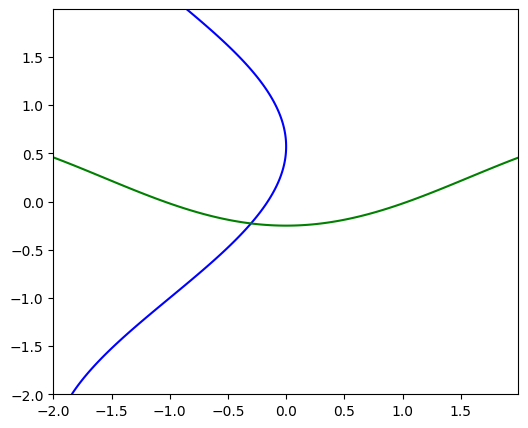

In [3]:
def var_f(x: np.array) -> np.array:
    return np.array([np.sin(x[1] + 1) - x[0] - 1,
                     2 * x[1] + np.cos(x[0]) - 0.5], dtype=np.double)


custom_solution_f, iter_cnt_f = root(var_f, np.array([-1, 0]))
custom_solution_s, iter_cnt_s = root(var_f, np.array([1, 2]))
scipy_solution_f = scipy.optimize.fsolve(var_f, np.array([-1, 0]))
scipy_solution_s = scipy.optimize.fsolve(var_f, np.array([1, 2]))


print(f'Newton\'s method first solution: {custom_solution_f}')
print(f'Number of iterations: {iter_cnt_f}')
print(f'Newton\'s method second solution: {custom_solution_s}')
print(f'Number of iterations: {iter_cnt_s}')
print(f'Scipy solutions: {scipy_solution_f}, {scipy_solution_s}')


x, y = np.meshgrid(np.arange(-2, 2, 0.005), np.arange(-2, 2, 0.005))
plt.figure(figsize=(6, 5))
plt.contour(x, y, np.sin(y + 1) - x - 1, [0], colors=['blue'])
plt.contour(x, y, 2*y + np.cos(x) - 0.5, [0], colors=['green'])
plt.show()


### Задание № 4.5.6

Point (12.5, 10.0, 13.859):
Distance = 6.7827, closest point = (7.7, 5.62, 15.803814086914063)
Point (6.629, 9.186, 10.394):
Distance = 3.6306, closest point = (4.824, 6.26, 11.565518188476563)
Point (11.719, 5.413, 6.125):
Distance = 6.2328, closest point = (6.62, 2.756, 8.533173370361329)


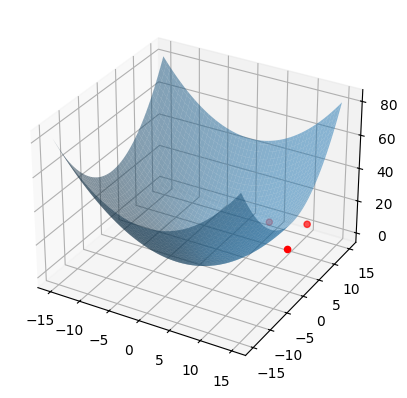

In [5]:
from scipy.optimize import minimize
# Функция для вычисления расстояния от точки до поверхности
def distance_f(p, coefs):
    def f(phi):
        x, y, z = inv_transform(phi, coefs)
        return np.sqrt((x - p[0])**2 + (y - p[1])**2 + (z - p[2])**2)
    return f

# Функция для преобразования обобщенных координат в декартовы координаты
def inv_transform(phi, coefs):
    a1, a2 = coefs
    x = phi[0]
    y = phi[1]
    z = (x**2 / a1) + (y**2 / a2)
    return x, y, z

def find_closest_and_farthest_point(ps, coefs):
    distances = {}
    for p in ps:
        solution = None
        res_dist = np.inf
        for i in np.arange(0, np.pi, 0.1):
            angles = np.array([i, i], dtype=np.float16)
            dist = distance_f(p, coefs)
            solution_angles = minimize(dist, angles, method='Nelder-Mead', tol=1e-6).x
            x, y, z = inv_transform(solution_angles, coefs)
            if dist(solution_angles) < res_dist:
                res_dist = dist(solution_angles)
                solution = x, y, z
        distances[tuple(p)] = (solution, res_dist)
    return distances
# Коэффициенты a1 и a2
N = 9
a1 = 8.5 - N * 0.25
a2 = 2.3 + N * 0.3
coefs = (a1, a2)

# Координаты точек P1, P2, P3
ps = np.array([
    [12.5, 10, 13.859],
    [6.629, 9.186, 10.394],
    [11.719, 5.413, 6.125]
])

# Находим ближайшую и наиболее удаленную точки
distances = find_closest_and_farthest_point(ps, coefs)

# Вывод результатов
for point, (solution, res_dist) in distances.items():
    print(f'Point {point}:')
    print(f'Distance = {res_dist:.4f}, closest point = {solution}')

# Строим график поверхности S и точек P_i
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Создаем сетку для поверхности S
x = np.linspace(-15, 15, 100)
y = np.linspace(-15, 15, 100)
x, y = np.meshgrid(x, y)
z = (x**2 / a1) + (y**2 / a2)

# Построение поверхности S
ax.plot_surface(x, y, z, alpha=0.5)

# Построение точек P_i
ax.scatter(ps[:,0], ps[:,1], ps[:,2], color='red')

plt.show()


distance_f: Это функция, которая вычисляет расстояние от заданной точки до поверхности. Внутри функции используется другая функция inv_transform, которая преобразует обобщенные координаты в декартовы координаты поверхности. Для вычисления расстояния используется обычная евклидова норма между координатами точки и координатами поверхности в данной точке.

inv_transform: Это функция, которая преобразует обобщенные координаты (углы) в декартовы координаты поверхности. В данном случае, обобщенные координаты это координаты на плоскости XY, а значение Z вычисляется согласно уравнению поверхности.

find_closest_and_farthest_point: Это функция, которая находит ближайшую и наиболее удаленную от поверхности точки. Она проходит по каждой заданной точке и использует метод Ньютона для нахождения ближайшей точки на поверхности. Затем она вычисляет расстояние между заданной точкой и найденной ближайшей точкой. Поиск наиболее удаленной точки производится аналогично.

### Задание № 5.1.28

In [6]:
class SparseMatrix:
    """Sparse matrix class based on dict of nonzero values"""
    
    def __init__(self,
                 data: Dict[Tuple[int, int], float] = None,
                 n: int = 2):
        self.data = data or {}
        self.n = n

    def from_dense_matrix(self, matrix) -> "SparseMatrix":
        self.n = len(matrix)
        for i in range(len(matrix)):
            for j in range(len(matrix[0])):
                if matrix[i][j] != 0:
                    self[(i, j)] = matrix[i][j]
        return self
    
    def dense(self) -> "SparseMatrix":
        res = np.zeros((self.n, self.n))
        for (i, j), v in self.data.items():
            res[i, j] = v
        return res

    def __getitem__(self, key: Tuple[int, int]) -> float:
        return self.data.get(key, 0)

    def __setitem__(self, key: Tuple[int, int], value: float):
        self.data[key] = value

    def __iter__(self):
        return iter(self.data.items())

    def __len__(self):
        return self.n

    def __add__(self, other: "SparseMatrix") -> "SparseMatrix":
        result = SparseMatrix()
        for key in self:
            result[key] += self[key]
        for key in other:
            result[key] += other[key]
        return result

    def __sub__(self, other: "SparseMatrix") -> "SparseMatrix":
        result = SparseMatrix()
        for key in self:
            result[key] = self[key]
        for key in other:
            result[key] -= other[key]
        return result

    def __mul__(self, other: "SparseMatrix") -> "SparseMatrix":
        result = SparseMatrix()
        for key in self:
            for key2 in other:
                result[(key[0], key2[1])] += self[key] * other[key2]
        return result

    def __rmul__(self, other: float) -> "SparseMatrix":
        result = SparseMatrix()
        for key in self:
            result[key] = self[key] * other
        return result

    def __truediv__(self, other: float) -> "SparseMatrix":
        result = SparseMatrix()
        for key in self:
            result[key] = self[key] / other
        return result

    def __neg__(self) -> "SparseMatrix":
        result = SparseMatrix()
        for key in self:
            result[key] = -self[key]
        return result

    def __pow__(self, other: float) -> "SparseMatrix":
        result = SparseMatrix()
        for key in self:
            result[key] = self[key] ** other
        return result

    def __rpow__(self, other: float) -> "SparseMatrix":
        result = SparseMatrix()
        for key in self:
            result[key] = other ** self[key]
        return result

    def __eq__(self, other: "SparseMatrix") -> bool:
        return self.data == other.data

    def __ne__(self, other: "SparseMatrix") -> bool:
        return self.data != other.data


In [7]:
def seidel(a: np.ndarray,
           b: np.ndarray,
           x: np.ndarray = None,
           eps: float = 1e-9,
           max_iter: int = None) -> Tuple[np.ndarray, int]:
    """
    Seidel solver for system of linear equations.
    
    :param a: np array or sparse matrix, matrix form of the system
    :param b: np array, right part vector of the system
    :param x: np array, initial point for solution
    :param eps: float, precision by norm
    :param max_iter: int, number of max iterations
    """
    n = len(a)
    x = x if x is not None else np.zeros(n)
    converge = False
    iter_cnt = 0
    while not converge:
        x_new = np.copy(x)
        for i in range(n):
            s1 = sum(a[i, j] * x_new[j] for j in range(i))
            s2 = sum(a[i, j] * x[j] for j in range(i + 1, n))
            x_new[i] = (b[i] - s1 - s2) / a[i, i]
        iter_cnt += 1
        converge = np.linalg.norm(x_new - x, ord=np.inf) <= eps
        if max_iter:
            converge = iter_cnt >= max_iter
        x = x_new
    return x, iter_cnt

In [8]:
A = np.array([
    [2.97, 0.4, 0.3, 1.98, 0, 0.1],
    [0.99, 4.9, 0.4, 2.97, 0.2, -0.3],
    [0, -1.8, 6.6, 3.3, 0.6, 0.8],
    [4.95, 1.6, 1.2, 8.91, 0.8, 0.3],
    [1.98, -1.5, 0.4, -1.98, 6.1, 0],
    [9.9, 1.4, 2.4, 5.94, 3.2, 23.3]
])

b = np.array([-10.45, -8.28, 4.48, -26.93, 11.82, 38.84])

np_solution = np.linalg.solve(A, b)
print(f"Numpy solution: {np_solution}\n")

n = len(A)
L = np.tril(A, -1)
U = np.triu(A, 1)
D = np.diag(np.diag(A))
B = np.linalg.inv(L + D).dot(-U)

converge = np.linalg.norm(B, ord=np.inf) < 1
print(f"System convergence with Seidel iterative method: {converge}")
if converge:
    seidel_solution_1, _ = seidel(A, b, x=np.zeros(n), max_iter=10)
    seidel_solution_2, _ = seidel(A, b, x=np.ones(n), max_iter=10)
    eps_1 = np.linalg.norm(np_solution - seidel_solution_1, ord=np.inf)
    eps_2 = np.linalg.norm(np_solution - seidel_solution_2, ord=np.inf)
    
    print(f"x = {np.zeros(n)}")
    print("Seidel method solution:")
    print(seidel_solution_1)
    print(f"Solution precision by infinity norm: {eps_1:.6f}")
    print(f"x = {np.ones(n)}")
    print("Seidel method solution:")
    print(seidel_solution_2)
    print(f"Solution precision by infinity norm: {eps_2:.6f}")

Numpy solution: [-2.28282828  0.1         1.3        -2.21212121  1.9         2.8       ]

System convergence with Seidel iterative method: True
x = [0. 0. 0. 0. 0. 0.]
Seidel method solution:
[-2.2828207   0.10000829  1.30001537 -2.2121275   1.89999653  2.79999678]
Solution precision by infinity norm: 0.000015
x = [1. 1. 1. 1. 1. 1.]
Seidel method solution:
[-2.28281833  0.10001133  1.30002147 -2.2121296   1.89999542  2.79999565]
Solution precision by infinity norm: 0.000021



Давайте рассмотрим последовательность действий в коде, который использует класс SparseMatrix и метод Зейделя для решения системы линейных уравнений.

Инициализация матрицы системы и вектора правой части:

Матрица коэффициентов 
�
A и вектор правой части 
�
b определяются из условий задачи.
Вычисление точного решения методом Гаусса:

Вызывается функция np.linalg.solve(A, b), которая вычисляет точное решение системы линейных уравнений методом Гаусса. Результат сохраняется в переменной np_solution.
Проверка условия сходимости метода Зейделя:

Матрица системы разбивается на нижнюю треугольную матрицу 
�
L, верхнюю треугольную матрицу 
�
U и диагональную матрицу 
�
D.
Создается матрица 
�
B, равная 
−
(
�
+
�
)
−
1
�
−(L+D) 
−1
 U.
Проверяется выполнение условия сходимости: 
∣
∣
�
∣
∣
∞
<
1
∣∣B∣∣ 
∞
​
 <1, где 
∣
∣
�
∣
∣
∞
∣∣B∣∣ 
∞
​
  - максимальная сумма абсолютных значений элементов строки матрицы 
�
B.
Решение методом Зейделя:

Для решения системы методом Зейделя используется функция seidel.
Вызывается эта функция с передачей матрицы 
�
A и вектора 
�
b и двух начальных приближений: нулевого вектора и вектора, содержащего единицы.
Внутри функции seidel происходит итерационный процесс, на каждой итерации вычисляется новое приближенное решение системы.
Вычисление абсолютной погрешности:

Для каждого результата метода Зейделя считается абсолютная погрешность по норме 
∞
∞, сравнивая полученное решение с точным решением, полученным методом Гаусса.
Вывод результатов:

Выводится точное решение системы, результаты работы метода Зейделя для двух начальных приближений и абсолютная погрешность для каждого из них.
Таким образом, код последовательно ищет точное решение системы методом Гаусса, проверяет сходимость метода Зейделя, вычисляет его решение с двумя разными начальными приближениями и оценивает абсолютную погрешность итерационного решения по сравнению с точным.

### Задание № 5.4.16

In [9]:
def calculate_norm(t):
    B = np.array([[0.01, -0.1, 0.12, t, 0.2],
                  [0.1, 0.08, -0.09, 0, 0.2],
                  [t, 0.15, -0.06, 0.1, 0],
                  [0.3, 0.1, -0.01, 0.2, -0.2],
                  [0.01, 0.07, -0.1, 0, 0.1]])
    norm_inf = np.linalg.norm(B, ord=np.inf)
    return norm_inf

t_values = np.arange(-1, 1.1, 0.2)

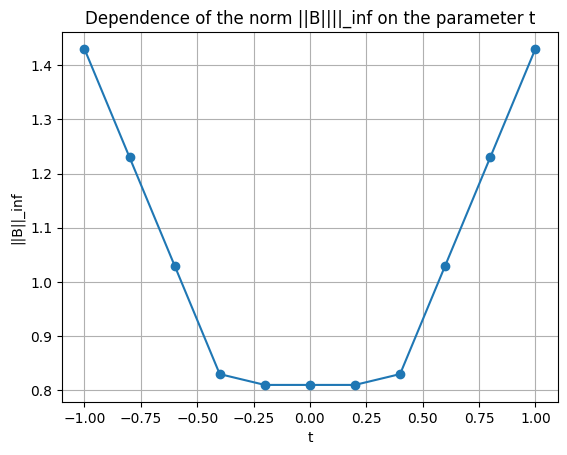

In [10]:
norm_values = [calculate_norm(t) for t in t_values]
plt.plot(t_values, norm_values, marker='o')
plt.title('Dependence of the norm ||B||||_inf on the parameter t')
plt.xlabel('t')
plt.ylabel('||B||_inf')
plt.grid(True)
plt.show()

In [12]:
max_t = max(t_values_true)
B_max_t = np.array([[0.01, -0.1, 0.12, max_t, 0.2],
                    [0.1, 0.08, -0.09, 0, 0.2],
                    [max_t, 0.15, -0.06, 0.1, 0],
                    [0.3, 0.1, -0.01, 0.2, -0.2],
                    [0.01, 0.07, -0.1, 0, 0.1]])
c = np.array([1, 1, 0, 2, 3])
def zeid(B, c, x0, num_iterations):
    for i in range(num_iterations):
        x = x0.copy()
        x = np.dot(B, x) + c
        if np.linalg.norm(x0 - x, ord=np.inf) <= 1e-5:
            return x
        x0 = x
    return x

x0 = np.zeros_like(c)

result_z = zeid(B_max_t, c, x0, 1000000)
print("Solution using Seidel method:", result_z)

Solution using Seidel method: [2.88664278 1.96454567 1.64783392 2.97367868 3.33511321]
